# OPER 685 - Machine Learning I
## Homework 1
## Brandon Hosley

In [1]:
%load_ext ipydex.displaytools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## 1. 
(50 Points) Apply principal component analysis to the breast cancer data set   Download breast cancer data set . The data set contains 569 multi-variate samples. Each sample consists of 30 input features and has one of two potential labels (i.e., benign (0) and malignant (1)) associated with it.

In [2]:
df = pd.read_csv('breast cancer.csv', sep=',') # read in the data set

    a. (5 points) What are the eigenvalues associated with the first 10 principal components?

In [3]:
from sklearn.preprocessing import StandardScaler

df1 = pd.DataFrame(StandardScaler().fit(df).transform(df))

cov1 = df1.cov()
eigVals, eigVecs = np.linalg.eig(cov1)

eigVals[:10] ##:

(eigVals[:10]) := 
array([13.94227406,  5.73643378,  2.85186154,  2.00188139,  1.66199949,
        1.20963379,  0.68592465,  0.48570906,  0.4176288 ,  0.35151141])

---

    b. (5 points) Which eigenvalues satisfy Kaiser’s criterion?

In [4]:
np.sum(eigVals > 1) ##:

(np.sum(eigVals > 1)) := 6

---

The first 6 eigenvalues satisfy Kaiser's criterion.

In [5]:
eigVals[:6] ##:

(eigVals[:6]) := 
array([13.94227406,  5.73643378,  2.85186154,  2.00188139,  1.66199949,
        1.20963379])

---

    c. (5 points) Which eigenvalues satisfy Jolliffe’s criterion?

In [6]:
np.sum(eigVals > (0.7* np.average(eigVals))) ##:
np.average(eigVals) ##:

eigVals[:6] ##:

(np.sum(eigVals > (0.7* np.average(eigVals)))) := 6

---

(np.average(eigVals)) := 1.0017605633802829

---

(eigVals[:6]) := 
array([13.94227406,  5.73643378,  2.85186154,  2.00188139,  1.66199949,
        1.20963379])

---

The first 6 eigenvalue satisfies Jolliffe's criterion.

    d. (5 points) Generate (and show) a scree plot and discuss any insights you obtain.

<AxesSubplot:>

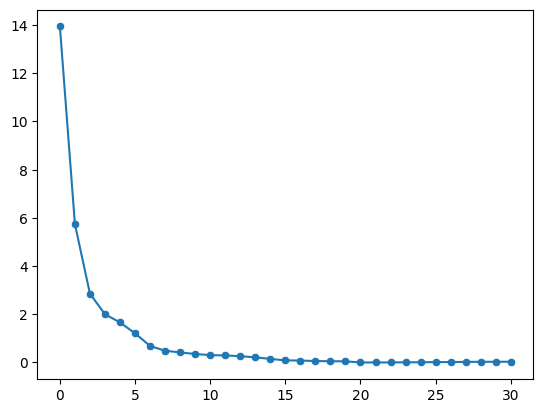

In [7]:
sns.lineplot(eigVals)
sns.scatterplot(eigVals)

The improvement on explanation power becomes subject to significant diminishing returns around the 5 $\pm$ 1 range. This is also consistent with the values specified by the criteria above.

    e. (5 points) What percentage of the total variance is accounted for by the first two principal components?

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_components = pca.fit_transform(df1)
pc_df = pd.DataFrame(df_components, columns=['PC'+str(i) for i in range(1,df_components.shape[1]+1)])
pc_df['label'] = df['label'].astype('category')

pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_[:3])

0.7255152452459434

72.55152452459436 % of total variance is explained by the first two components.

    f. (5 points) What percentage of the total variance is accounted for by the first three principal components?

In [9]:
np.sum(pca.explained_variance_ratio_[:4]) ##:

(np.sum(pca.explained_variance_ratio_[:4])) := 0.7899785724869541

---

78.99785724869544 % of the total variance is explained by the first three components.

    g. (5 points) Plot the data in principal component space and discuss insights obtained.

Text(0.5, 1.0, 'Principle Components and Cancer Diagnosis')

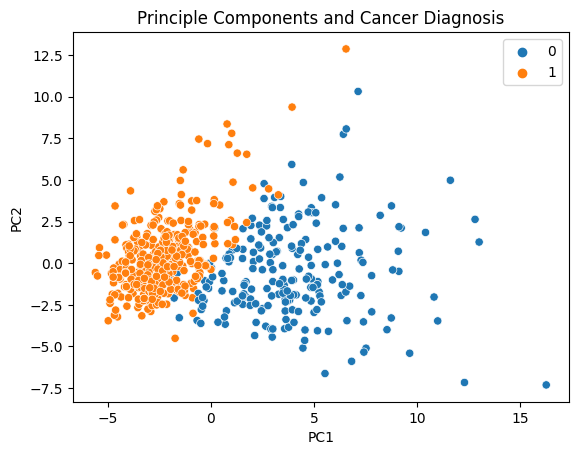

In [10]:
sns.scatterplot(data = pc_df, x = 'PC1', y = 'PC2', hue = 'label')
plt.legend(loc='upper right')
plt.title('Principle Components and Cancer Diagnosis')

## 2. 
(50 points) Examine the standardized variance-covariance matrix (i.e., the correlation matrix) given below, and apply factor analysis utilizing the Principal Component method shown in class (i.e., matrix multiplication not scikit learn) (20 points for correct application).

$$
\sum = 
\overset{\quad\qquad \#pushups\ \#pullups\ \#squats\ \#lunges}{
\begin{matrix} \scriptsize{\#pushups} \\ \scriptsize{\#pullups} \\ \scriptsize{\#squats} \\ \scriptsize{\#lunges} \end{matrix}
\begin{bmatrix}
1.00 & 0.58 & 0.18 & 0.05 \\
0.58 & 1.00 & 0.02 & 0.01 \\
0.18 & 0.02 & 1.00 & 0.75 \\
0.05 & 0.01 & 0.75 & 1.00 
\end{bmatrix}}
$$

    a. (5 points) What insights can you obtain from examining Σ?

There appears to be notable correlation between pushups and pullups and between squats and lunges.

    b. (5 points) What eigenvalues does eigen decomposition yield?

In [11]:
sigma = np.array([[1.00,0.58,0.18,0.05],
                    [0.58,1.00,0.02,0.01],
                    [0.18,0.02,1.00,0.75],
                    [0.05,0.01,0.75,1.00]])

eigVals_f, eigVecs_f = np.linalg.eig(sigma) ##:

(eigVals_f, eigVecs_f) := (array([1.82670207, 1.51448922, 0.43203844, 0.22677028]),
 array([[ 0.37747404,  0.59442823,  0.66308202,  0.2539501 ],
        [ 0.28760727,  0.65141738, -0.67832897, -0.18112777],
        [ 0.6386683 , -0.29861728,  0.16799588, -0.6889905 ],
        [ 0.60572124, -0.36488107, -0.26827118,  0.65421263]]))

---

    c. (5 points) Calculate the factor loadings, common variance matrix, and uniqueness matrix for d=2 (i.e., 2 factors).

In [12]:
d = 2
E = eigVals_f[:d]*np.eye(d)
V = eigVecs_f.T[:d]
Lam = E**0.5@V
Psi = np.eye(np.shape(V)[1]) - np.diag(np.diag(Lam.T@Lam))

factor_loadings = Lam ##:
com_var = Lam.T@Lam ##:
uniqueness = Psi @ np.ones((np.shape(Psi)[1],1)) ##:


factor_loadings := 
array([[ 0.51017709,  0.38871716,  0.8631956 ,  0.81866582],
       [ 0.73153064,  0.8016641 , -0.36749212, -0.44903937]])

---

com_var := array([[ 0.79541774,  0.78475644,  0.17155087,  0.08917849],
                  [ 0.78475644,  0.79376636,  0.04093371, -0.04174929],
                  [ 0.17155087,  0.04093371,  0.8801571 ,  0.87168716],
                  [ 0.08917849, -0.04174929,  0.87168716,  0.87185009]])

---

uniqueness := array([[0.20458226],
                     [0.20623364],
                     [0.1198429 ],
                     [0.12814991]])

---

    d. (5 points) Compute the communalities.

In [13]:
communalities = Lam.T**2 @np.ones((np.shape(Lam)[0],1)) ##:

communalities := array([[0.79541774],
                        [0.79376636],
                        [0.8801571 ],
                        [0.87185009]])

---

    e. (5 points) What percentage of the total variance is accounted for by factor 1, by factor 2?

In [14]:
s = Lam**2 @ np.ones((np.shape(Lam)[1],1)) ##:
s / (np.sum(s) + np.sum(Psi)) ##:

s := array([[1.82670207],
            [1.51448922]])

---

(s / (np.sum(s) + np.sum(Psi))) := array([[0.45667552],
                                          [0.3786223 ]])

---

Factor 1 explains approximately 45.667552% of total variance, and Factor 2 explains approximately 37.86223% of total variance.

    f. (5 points) Determine appropriate names for the factors.

F1: upper-body fitness and F2: lower-body fitness.